### Manually calculate mean:

In [1]:
# function to take list of values (list_values) and return mean
def mean_values(list_values):
    mean = 0
    list_length = 0
    
    # iterate through element in list_values
    for element in list_values:
        # for every element, increase list_length
        list_length += 1
    
    # iterate through each element of list
    for num in list_values:
        # mean conversation: mean = sum of num / amount of num
        mean = mean + num/list_length
    
    return mean

In [2]:
mean_values([9, 10, 12])

10.333333333333334

### Manually calculate standard deviation

In [3]:
# calculate standard deviation
def standard_deviation(list_values):
    mean = 0
    list_length = 0
    squared_diff = []
    squared_sum = 0
    standard_deviation = 0
    
    # find mean of list_values
    # iterate through element in list_values
    for element in list_values:
        # for every element, increase list_length
        list_length += 1
    
    # iterate through each element of list
    for num in list_values:
        # mean conversation: mean = sum of num / amount of num
        mean = mean + num/list_length
    
    # list of squared differences
    for num in list_values:
        squared_diff.append((num-mean)**2)
    
    # find sum of the squared differences
    for num in squared_diff:
        squared_sum += num
    
    # standard deviation is the square root of the squared_sum divided by list_length-1
    standard_deviation = ((squared_sum/(list_length-1))**0.5)
    
    return standard_deviation

### Data cleaning function

In [4]:
# function take a string number and returns as a float
def percent_dec_approx(num_per):
    updated_string = ''
    string_to_float = 0.0
    
    # iterate through each character of string
    for char in num_per:
        # add any char != '% to updated_string
        if char != '%' and '.':
            updated_string += char
    # convert updated_string into a float
    # num_per returned without the percentage and a float
    string_to_float = float(updated_string)
    
    # converts float to decimal approximation
    percent_dec_approx = string_to_float/100

    return percent_dec_approx

In [2]:
# Imports:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Cleaning act_2019.csv

In [6]:
# import data
act_2019 = pd.read_csv('../data/act_2019.csv')
# display dataframe
act_2019.head()

,State,Participation,Composite
0,Alabama,100%,18.9
1,Alaska,38%,20.1
2,Arizona,73%,19.0
3,Arkansas,100%,19.3
4,California,23%,22.6


In [7]:
# check for missing (or null) values
act_2019.isnull().sum()

State            0
Participation    0
Composite        0
dtype: int64

In [8]:
# information on the dataframe
act_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [9]:
# used percent_dec_approx(num_per) to conver Participation % to float
# .map goes through every cell and runs the function
act_2019['Participation Percent'] = act_2019['Participation'].map(percent_dec_approx)
act_2019.head()

,State,Participation,Composite,Participation Percent
0,Alabama,100%,18.9,1.00
1,Alaska,38%,20.1,0.38
2,Arizona,73%,19.0,0.73
3,Arkansas,100%,19.3,1.00
4,California,23%,22.6,0.23


In [10]:

# dropped Participation because we have a float Participation Percent now
act_2019.drop('Participation', inplace = True, axis = 1)
act_2019.head()

,State,Composite,Participation Percent
0,Alabama,18.9,1.00
1,Alaska,20.1,0.38
2,Arizona,19.0,0.73
3,Arkansas,19.3,1.00
4,California,22.6,0.23


In [11]:
act_2019.rename(columns ={
                'State': 'state',
                'Composite': 'comp_score',
                'Participation Percent': 'participation'}, inplace = True)

act_2019.head()

,state,comp_score,participation
0,Alabama,18.9,1.00
1,Alaska,20.1,0.38
2,Arizona,19.0,0.73
3,Arkansas,19.3,1.00
4,California,22.6,0.23


In [12]:
act_2019[['state', 'comp_score']].head()

,state,comp_score
0,Alabama,18.9
1,Alaska,20.1
2,Arizona,19.0
3,Arkansas,19.3
4,California,22.6


In [1]:
# dictionary comprehension
#{state: score for state, score in act_2019[['state', 'comp_score']]}

In [2]:
# act_dict = {act_2019['state']: act_2019['comp_score'] for act_2019['state'], act_2019['comp_score'] in act_2019.to_dict().items()}

### Exploratory Data Analysis

In [15]:
# .describe() will give summary statistics for each of your column
act_2019.describe()

,comp_score,participation
count,52.000000,52.000000
mean,21.450000,0.585385
std,2.175487,0.341883
min,17.900000,0.060000
25%,19.800000,0.247500
50%,20.950000,0.530000
75%,23.650000,1.000000
max,25.500000,1.000000


In [16]:
# which states have the highest and lowest participation rates for ACT in 2019?
act_2019['participation'].value_counts()
act_2019.sort_values(['participation', 'comp_score','state'], ascending = False).head(16)
act_2019.sort_values(['participation', 'comp_score','state'], ascending = False).tail(5)

# observations: 
# sorted by participation, then by comp_score, then will show states
# 15 states had 100% participation, and Wisconsin had the highest average comp_score of that group at 20.3
# The state with the lowest ACT, but 100% participation: Nevada
# Maine had the lowest participation rate at 6%, their average comp_score was 24.3

,state,comp_score,participation
38,Pennsylvania,23.6,0.17
29,New Hampshire,25.0,0.14
7,Delaware,24.1,0.13
39,Rhode Island,24.7,0.12
19,Maine,24.3,0.06


In [17]:
# which states have the highest and lowest ACT scores in 2019?
act_2019.sort_values(['comp_score','state'], ascending = False).head(5)
act_2019.sort_values(['comp_score','state'], ascending = False).tail(5)

# observations:
# Massachusetts has the highest comp_score at 25.5, but only a participation of 21%
# Nevada has the lowest comp_score at 17.9, with a participation of 100%

,state,comp_score,participation
0,Alabama,18.9,1.00
40,South Carolina,18.8,0.78
18,Louisiana,18.8,1.00
24,Mississippi,18.4,1.00
28,Nevada,17.9,1.00


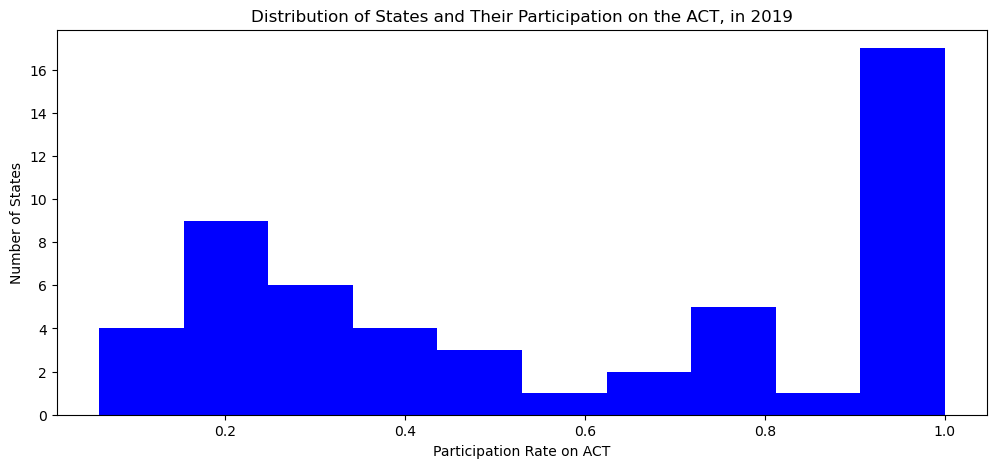

In [18]:
# create a histogram that highlights the participation rate of the dataset
# size
plt.figure(figsize = (12,5))

# plotting
plt.hist(act_2019['participation'], color = 'blue')

# title
plt.title('Distribution of States and Their Participation on the ACT, in 2019')
# axis labels
plt.xlabel('Participation Rate on ACT')
plt.ylabel('Number of States');

# assume: 1.0 means a state required the ACT
# will not use graph

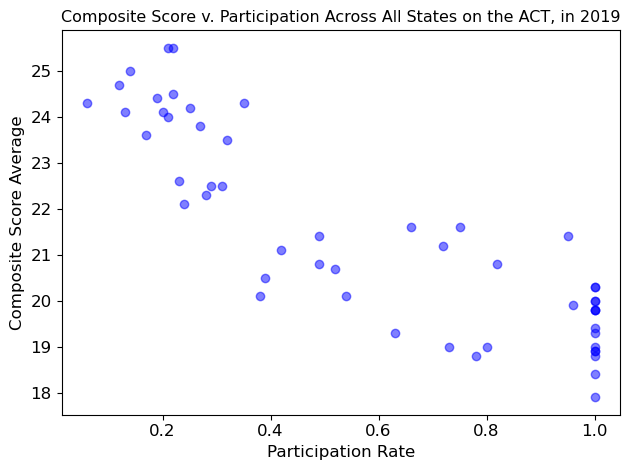

In [24]:
# create a scatter plot to see if there is a connection between composite score average and participation
plt.title('Composite Score v. Participation Across All States on the ACT, in 2019', size = 11.5)

# creating scatter plot
plt.scatter(act_2019['participation'],
           act_2019['comp_score'],
           color = 'b', alpha = 0.5);
# labeling x and y axis, tick-sizing
plt.xlabel('Participation Rate', size = 12)
plt.ylabel('Composite Score Average', size = 12);
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12);

# saving scatter plot
plt.tight_layout()
plt.savefig('../graphs/comp_score_part_scatter_act.png')

# plots a point of the states and their average score
# observation: states with lower participation have a higher score than states who do require participation

In [69]:
# checking correlation
act_2019.corr()

# conclusion: the numbers are closer to -1, so correlation between the comp_score and participation is unlikely

,comp_score,participation
comp_score,1.000000,-0.864154
participation,-0.864154,1.000000


In [25]:
# check which states require participation (==1.0)
req_part = act_2019[act_2019['participation'] == 1.0]
req_part

,state,comp_score,participation
0,Alabama,18.9,1.0
3,Arkansas,19.3,1.0
17,Kentucky,19.8,1.0
18,Louisiana,18.8,1.0
24,Mississippi,18.4,1.0
26,Montana,19.8,1.0
27,Nebraska,20.0,1.0
28,Nevada,17.9,1.0
33,North Carolina,19.0,1.0
35,Ohio,20.0,1.0


In [26]:
# sorted_list to show the highest and lowest comp_score of the 100% required
sorted_list = act_2019[act_2019['participation'] == 1.0].sort_values(by = 'comp_score', ascending = False)
sorted_list

,state,comp_score,participation
44,Utah,20.3,1.0
49,Wisconsin,20.3,1.0
27,Nebraska,20.0,1.0
35,Ohio,20.0,1.0
17,Kentucky,19.8,1.0
26,Montana,19.8,1.0
50,Wyoming,19.8,1.0
42,Tennessee,19.4,1.0
3,Arkansas,19.3,1.0
33,North Carolina,19.0,1.0


In [27]:
# pulls only the states (100% participation) with the highest scores
highest_states = sorted_list.head(3)
highest_states

,state,comp_score,participation
44,Utah,20.3,1.0
49,Wisconsin,20.3,1.0
27,Nebraska,20.0,1.0


In [28]:
# pulls only the states (100% participation) with the lowest scores 
lowest_states = sorted_list.tail(3)
lowest_states

,state,comp_score,participation
18,Louisiana,18.8,1.0
24,Mississippi,18.4,1.0
28,Nevada,17.9,1.0


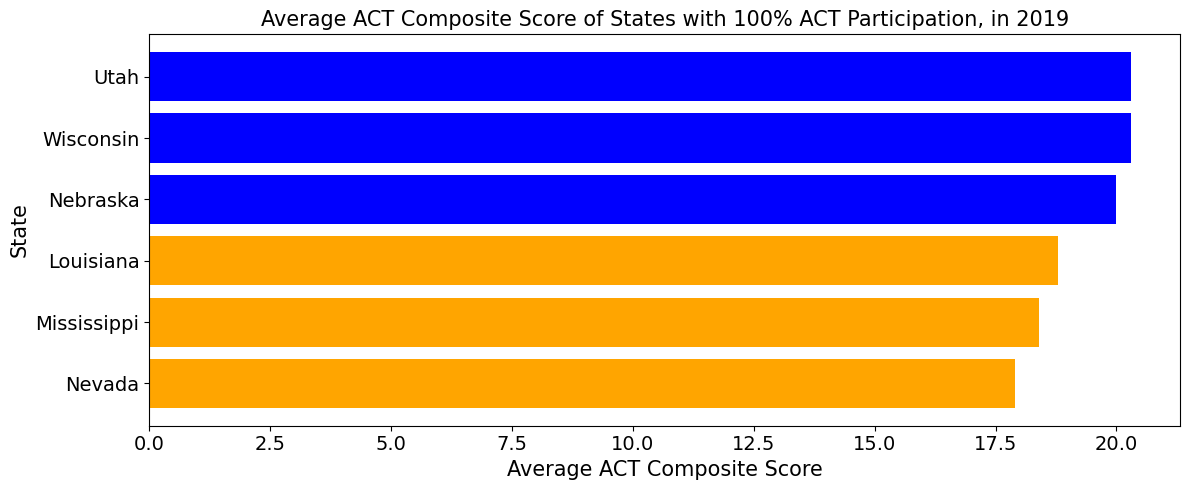

In [29]:
# plt.barh() will create a horizontal bar chart. (Note the h at the end of bar!)

# create our figure
plt.figure(figsize = (12,5))

# horizontal bar chart
plt.barh(lowest_states['state'][::-1],
        lowest_states['comp_score'][::-1], color = 'orange') #[::-1] reverses the order,

plt.barh(highest_states['state'][::-1],
        highest_states['comp_score'][::-1], color = 'blue', ) #[::-1] reverses the order,

# add a title
plt.title('Average ACT Composite Score of States with 100% ACT Participation, in 2019', size = 15)

# add axis labels, tick sizing
plt.ylabel('State', size = 15)
plt.xlabel('Average ACT Composite Score', size = 15);
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)

# saving bar chart
plt.tight_layout()
plt.savefig('../graphs/average_comp_score_states_act.png')

# Point out...Utah and Nevada are right next to each other on the map but have vastly different scores?

In [30]:
# reference this data
# https://nces.ed.gov/programs/digest/d20/tables/dt20_702.60.asp
# Note: U.S. has estimated population of children ages 3 - 18 living in households: 65,000,000

In [31]:
# Observations on Utah, Wisconsin, and Nebraska

# % of children with desktop or laptop
# UT - 95.6% of 837k, WI - 91.9% of 1,139k, NB - 93.0% of 421k
# % of children with Internet access on their desktop or laptop
# UT - 94.6%, WI - 90.6%, NB - 90.9%

# How many have smartphones?
# All above 95%
# Internet access only via smartphone?
# all less than 7%

# No Internet Access
# UT - 2.1, WI - 4.4, NB - 2.9

In [3]:
# create visual for above statistics
nces_highest = pd.DataFrame(columns = ['Children ages 3 to 18 (thous)','With Desktop or Laptop', '   With Internet Access'],
                            index = ['Utah', 'Wisconsin', 'Nebraska'])
nces_highest.loc['Utah'] = [837, 95.6, 94.6]
nces_highest.loc['Wisconsin'] = [1139, 91.9, 90.6]
nces_highest.loc['Nebraska'] = [421, 93.0, 90.9]
                           
nces_highest

,Children ages 3 to 18 (thous),With Desktop or Laptop,With Internet Access
Utah,837,95.6,94.6
Wisconsin,1139,91.9,90.6
Nebraska,421,93.0,90.9


In [33]:
# Observations on Louisiana, Mississippi, and Nevada

# % of children with desktop or laptop
# LA - 83.6% of 973k, MS - 81.4% of 634k, NV - 88.8% of 619k
# % of children with Internet access on their desktop or laptop
# LA - 80.4%, MS - 79.2%, NV - 86.3%

# How many have smartphones?
# All above 95%
# Internet access only via smartphone?
# LA - 10.5%, MS - 11.5%, 7.8%

# No Internet Access
# LA - 9.1, MS - 9.2, NV - 5.8

In [4]:
# create visual for above statistics
nces_lowest = pd.DataFrame(columns = ['Children ages 3 to 18 (thous)','With Desktop or Laptop', '   With Internet Access'],
                            index = ['Louisiana', 'Mississippi', 'Nevada'])
nces_lowest.loc['Louisiana'] = [973, 83.6, 80.4]
nces_lowest.loc['Mississippi'] = [634, 81.4, 79.2]
nces_lowest.loc['Nevada'] = [619, 88.8, 86.3]

nces_lowest

,Children ages 3 to 18 (thous),With Desktop or Laptop,With Internet Access
Louisiana,973,83.6,80.4
Mississippi,634,81.4,79.2
Nevada,619,88.8,86.3
